In [1]:
%run PVModel_functions.ipynb

In [2]:
#This cell imports all the necessary packages & module data
import pandas as pd 
import numpy as np
from numpy import median
from datetime import datetime
import datatools
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import pvlib
import pvanalytics
import math
import pvpltools
import seaborn as sns
from pvpltools import iec61853
from pvpltools.module_efficiency import adr, heydenreich, motherpv, pvgis, mpm5, mpm6, bilinear
from pvpltools.module_efficiency import fit_efficiency_model, fit_bilinear

%matplotlib inline 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

mpl.rcParams['font.size']=12
mpl.rcParams['lines.linewidth']=1
mpl.rcParams['xtick.labelsize']=10
#mpl.rcParams['font.weight']='bold'
mpl.rcParams['axes.titlesize']=22
sns.set(rc={'figure.figsize':(12,7)})

mod_names = 'LG', 'Panasonic', 'Can270', 'Can275', 'HanQPlus', 'HanQPeak', 'MissionSolar', 'Jinko', 'Itek'
four_strings = ['LG', 'Panasonic', 'Can270', 'Can275', 'HanQPlus', 'HanQPeak', 'MissionSolar', 'Jinko']
mettablename =  'dbo.SNLA_Met_DataOut'

In [16]:
del meta
del meta4
del meta5

In [17]:
meta4 = pd.read_hdf('meta4.h5')
meta5 = pd.read_hdf('meta5.h5')

In [18]:
#Calculate MAPE/MBE for meta 4
strings = ['Str_1','Str_2','Str_3','Str_4', 'Str_5']
for string in strings:
    meta4['Diff ' + string] = (meta4['Modeled Power'] - meta4[string])
meta4['MBE'] = (meta4['Diff Str_1'] + meta4['Diff Str_2'] + meta4['Diff Str_3'] + meta4['Diff Str_4'])/4
#for string in strings:
 #    meta4['Abs%Error ' + string] = 100* abs((meta4['Modeled Power'] - meta4[string])/(meta4[string]))
#meta4['MAPE %'] = ((meta4.iloc[:,[15,16,17,18]].mean(axis=1)))

In [19]:
meta4.drop(columns=['Modeled Power', 'Str_1','Str_2','Str_3','Str_4', 'Str_5'], inplace=True)

In [7]:
#meta4['MAPE %'] = ((meta4.iloc[:,[4,5,6,7]].mean(axis=1)))

In [20]:
meta4.drop(columns=['Diff Str_1', 'Diff Str_2', 'Diff Str_3', 'Diff Str_4', 'Diff Str_5'], inplace=True)
#meta4.drop(columns=[ 'Abs%Error Str_1','Abs%Error Str_2','Abs%Error Str_3','Abs%Error Str_4', 'Abs%Error Str_5'], inplace=True)

In [21]:
meta4

,Time,Year,Model Name,System,MBE
Time,,,,,
2018-05-24 00:00:00-07:00,2018-05-24 00:00:00-07:00,2018,SAPM,LG,NaN
2018-05-24 00:01:00-07:00,2018-05-24 00:01:00-07:00,2018,SAPM,LG,NaN
2018-05-24 00:02:00-07:00,2018-05-24 00:02:00-07:00,2018,SAPM,LG,NaN
2018-05-24 00:03:00-07:00,2018-05-24 00:03:00-07:00,2018,SAPM,LG,NaN
2018-05-24 00:04:00-07:00,2018-05-24 00:04:00-07:00,2018,SAPM,LG,NaN
...,...,...,...,...,...
2021-08-31 23:56:00-07:00,2021-08-31 23:56:00-07:00,2021,BIL,Jinko,NaN
2021-08-31 23:57:00-07:00,2021-08-31 23:57:00-07:00,2021,BIL,Jinko,NaN
2021-08-31 23:58:00-07:00,2021-08-31 23:58:00-07:00,2021,BIL,Jinko,NaN


In [22]:
#Calculate MAPE/MBE for meta 5
strings = ['Str_1','Str_2','Str_3','Str_4','Str_5']
for string in strings:
    meta5['Diff ' + string] = (meta5['Modeled Power'] - meta5[string])
meta5['MBE'] = (meta5['Diff Str_1'] + meta5['Diff Str_2'] + meta5['Diff Str_3'] + meta5['Diff Str_4']+meta5['Diff Str_5'])/5
#for string in strings:
 #    meta5['Abs%Error ' + string] = 100* abs((meta5['Modeled Power'] - meta5[string])/(meta5[string]))
#meta['MAPE %'] = ((meta.iloc[:,[14,15,16,17]].mean(axis=1)))

In [23]:
meta5.drop(columns=['Modeled Power', 'Str_1','Str_2','Str_3','Str_4', 'Str_5'], inplace=True)

In [12]:
#meta5['MAPE %'] = ((meta5.iloc[:,[4,5,6,7,8]].mean(axis=1)))

In [24]:
meta5.drop(columns=['Diff Str_1', 'Diff Str_2', 'Diff Str_3', 'Diff Str_4'], inplace=True)
#meta5.drop(columns=[ 'Abs%Error Str_1','Abs%Error Str_2','Abs%Error Str_3','Abs%Error Str_4', 'Abs%Error Str_5'], inplace=True)

In [25]:
metas = [meta4, meta5]
meta = pd.concat(metas)

In [27]:
meta

,Time,Year,Model Name,System,MBE,Diff Str_5
Time,,,,,,
2018-05-24 00:00:00-07:00,2018-05-24 00:00:00-07:00,2018,SAPM,LG,NaN,NaN
2018-05-24 00:01:00-07:00,2018-05-24 00:01:00-07:00,2018,SAPM,LG,NaN,NaN
2018-05-24 00:02:00-07:00,2018-05-24 00:02:00-07:00,2018,SAPM,LG,NaN,NaN
2018-05-24 00:03:00-07:00,2018-05-24 00:03:00-07:00,2018,SAPM,LG,NaN,NaN
2018-05-24 00:04:00-07:00,2018-05-24 00:04:00-07:00,2018,SAPM,LG,NaN,NaN
...,...,...,...,...,...,...
2021-08-31 23:56:00-07:00,2021-08-31 23:56:00-07:00,2021,BIL,Itek,NaN,NaN
2021-08-31 23:57:00-07:00,2021-08-31 23:57:00-07:00,2021,BIL,Itek,NaN,NaN
2021-08-31 23:58:00-07:00,2021-08-31 23:58:00-07:00,2021,BIL,Itek,NaN,NaN


Text(0.5, 1.0, 'MBE (W)')

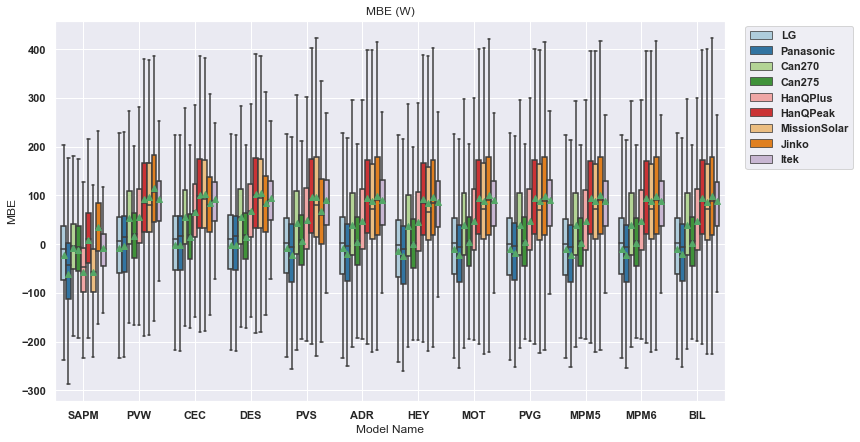

In [32]:
ax = sns.boxplot(x='Model Name', y='MBE', data = meta, hue='System', showmeans=True, showfliers=False,palette='Paired')
#ax.set_ylim([-150,150])
ax.grid(True)
ax.legend(bbox_to_anchor= (1.2, 1), loc='upper right')
ax.set_title('MBE (W)')